# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import math as mt
from functools import reduce


## Load data

In [2]:
# Load the data files into different DataFrames

calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [5]:
# Print a sample of data for plans

plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Plans dataframed has 2 rows and 8 columns, did not find any issues with the dataframe.

## Fix data

Not Applicable for plans dataframe

## Enrich data

Not Applicable for plans dataframe

## Users

In [6]:
# Print the general/summary information about the users' DataFrame
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [8]:
# Print a sample of data for users

users.head(15)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [9]:
users.isna().sum() / len(users) * 100

user_id        0.0
first_name     0.0
last_name      0.0
age            0.0
city           0.0
reg_date       0.0
plan           0.0
churn_date    93.2
dtype: float64

After examining the data, column churn_date is missing 93.2% of data.The missing values indicate that those plans were still in use at the time of extraction. The values cannot be dropped as its big chunk of vital data but we can add a column that states if the plan is active or not. Columns reg_date and churn_date can be converted to datetime datatype. 

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [10]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')

In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enrich Data

The ch

In [12]:
users['churn_active'] = np.where(users['churn_date'].isna(), 1, 0)

In [13]:
users.head(15)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,churn_active
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,1
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,1
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,1
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT,1
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,0
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT,1
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,1
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT,1


## Calls

In [14]:
# Print the general/summary information about the calls' DataFrame

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [15]:
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [16]:
calls.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [17]:
len(calls[calls['duration'] == 0])

26834

In [18]:
calls.drop(calls[calls['duration'] ==0].index, inplace=True)

In [19]:
# Print a sample of data for calls

calls.head(15)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [20]:
len(calls[calls['duration'] == 0])

0

Calls dataframe consist of 137735 rows and 4 columns. There are no missing values in calls dataframe but I do think we can convert call_date to datetime. Min duration of calls are 0 which means the call did not go through or they were not connected.

### Fix data

In [21]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')

### Enrich data

since calls are to be aggregated by month, we'll add a new column. Calls duration will be rounded up to the next minute as well.

In [22]:
calls['month'] = calls['call_date'].dt.month

In [23]:
calls['duration'] = calls['duration'].apply(np.ceil)

In [24]:
calls.head(15)

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,5.0,12
5,1000_388,1000,2018-12-31,3.0,12
6,1000_510,1000,2018-12-27,6.0,12
7,1000_521,1000,2018-12-28,15.0,12
8,1000_530,1000,2018-12-28,6.0,12
9,1000_544,1000,2018-12-26,5.0,12


## Messages

In [25]:
# Print the general/summary information about the messages' DataFrame

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [26]:
messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [27]:
# Print a sample of data for messages

messages.head(15)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


Messages dataframe consist of 76051 rows and 3 columns. There are no missing values but we can convert the message date column to datetime.

### Fix data

In [28]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')

In [29]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enrich data

In [30]:
messages['month'] = messages['message_date'].dt.month

## Internet

In [31]:
# Print the general/summary information about the internet DataFrame

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [32]:
internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [33]:
internet.drop(internet[internet['mb_used'] ==0].index, inplace=True)

In [34]:
# Print a sample of data for the internet traffic

internet.head(15)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92
10,1001_16,1001,2018-10-28,501.53


The internet dataframe consist of 104825 rows and 4 columns. There is no missing data but the session_date column can be converted to datetime. Session with 0 mb_used will be dropped as there of no value to us.

### Fix data

In [35]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

### Enrich data

In [36]:
internet['month'] = internet['session_date'].dt.month

## Study plan conditions

In [37]:
# Print out the plan conditions and make sure they are clear for you

plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user


In [38]:
# Calculate the number of calls made by each user per month. Save the result.

monthly_calls = calls.pivot_table(index= ['user_id', 'month'], values= 'id', aggfunc='count').reset_index()

print(monthly_calls)

      user_id  month  id
0        1000     12  16
1        1001      8  22
2        1001      9  38
3        1001     10  47
4        1001     11  49
...       ...    ...  ..
2251     1498     12  32
2252     1499      9  35
2253     1499     10  41
2254     1499     11  39
2255     1499     12  56

[2256 rows x 3 columns]


In [39]:
monthly_calls = monthly_calls.rename(columns={'id':'calls_made'})
print(monthly_calls)

      user_id  month  calls_made
0        1000     12          16
1        1001      8          22
2        1001      9          38
3        1001     10          47
4        1001     11          49
...       ...    ...         ...
2251     1498     12          32
2252     1499      9          35
2253     1499     10          41
2254     1499     11          39
2255     1499     12          56

[2256 rows x 3 columns]


In [40]:
# Calculate the amount of minutes spent by each user per month. Save the result.

per_minute_calls = calls.pivot_table(index= ['user_id', 'month'], values= 'duration', aggfunc='sum').reset_index()

print(per_minute_calls)

      user_id  month  duration
0        1000     12     124.0
1        1001      8     182.0
2        1001      9     315.0
3        1001     10     393.0
4        1001     11     426.0
...       ...    ...       ...
2251     1498     12     339.0
2252     1499      9     346.0
2253     1499     10     385.0
2254     1499     11     308.0
2255     1499     12     496.0

[2256 rows x 3 columns]


In [41]:
# Calculate the number of messages sent by each user per month. Save the result.
monthly_messages = messages.pivot_table(index= ['user_id', 'month'], values= 'id', aggfunc='count')
monthly_messages = monthly_messages.reset_index()
print(monthly_messages)


      user_id  month  id
0        1000     12  11
1        1001      8  30
2        1001      9  44
3        1001     10  53
4        1001     11  36
...       ...    ...  ..
1801     1496      9  21
1802     1496     10  18
1803     1496     11  13
1804     1496     12  11
1805     1497     12  50

[1806 rows x 3 columns]


In [42]:
monthly_messages = monthly_messages.rename(columns={'id':'msgs_sent'})
print(monthly_messages)

      user_id  month  msgs_sent
0        1000     12         11
1        1001      8         30
2        1001      9         44
3        1001     10         53
4        1001     11         36
...       ...    ...        ...
1801     1496      9         21
1802     1496     10         18
1803     1496     11         13
1804     1496     12         11
1805     1497     12         50

[1806 rows x 3 columns]


In [43]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
monthly_traffic = internet.pivot_table(index= ['user_id', 'month'], values= 'mb_used', aggfunc='sum').reset_index()
print(monthly_traffic)


      user_id  month   mb_used
0        1000     12   1901.47
1        1001      8   6919.15
2        1001      9  13314.82
3        1001     10  22330.49
4        1001     11  18504.30
...       ...    ...       ...
2272     1498     12  23137.69
2273     1499      9  12984.76
2274     1499     10  19492.43
2275     1499     11  16813.83
2276     1499     12  22059.21

[2277 rows x 3 columns]


In [44]:
monthly_traffic['gb_used'] = (monthly_traffic['mb_used'] / 1024).apply(np.ceil)
print(monthly_traffic)

      user_id  month   mb_used  gb_used
0        1000     12   1901.47      2.0
1        1001      8   6919.15      7.0
2        1001      9  13314.82     14.0
3        1001     10  22330.49     22.0
4        1001     11  18504.30     19.0
...       ...    ...       ...      ...
2272     1498     12  23137.69     23.0
2273     1499      9  12984.76     13.0
2274     1499     10  19492.43     20.0
2275     1499     11  16813.83     17.0
2276     1499     12  22059.21     22.0

[2277 rows x 4 columns]


I misread the description of the plans.

In [45]:
# Merge the data for calls, minutes, messages, internet based on user_id and month

data_frames = [monthly_calls, per_minute_calls, monthly_messages, monthly_traffic]

df = reduce(lambda left,right: pd.merge(left, right, on=['user_id', 'month'], how='outer'), data_frames)
print(df)


      user_id  month  calls_made  duration  msgs_sent   mb_used  gb_used
0        1000     12        16.0     124.0       11.0   1901.47      2.0
1        1001      8        22.0     182.0       30.0   6919.15      7.0
2        1001      9        38.0     315.0       44.0  13314.82     14.0
3        1001     10        47.0     393.0       53.0  22330.49     22.0
4        1001     11        49.0     426.0       36.0  18504.30     19.0
...       ...    ...         ...       ...        ...       ...      ...
2288     1407     11         NaN       NaN        1.0    290.06      1.0
2289     1482     10         NaN       NaN        2.0       NaN      NaN
2290     1094     10         NaN       NaN        NaN   1728.71      2.0
2291     1108     12         NaN       NaN        NaN    233.17      1.0
2292     1311      6         NaN       NaN        NaN   1498.83      2.0

[2293 rows x 7 columns]


In [46]:
# Add the plan information
df = df.merge(users, left_on = ['user_id'], right_on = ['user_id'], how= 'left')
df.head(15)

,user_id,month,calls_made,duration,msgs_sent,mb_used,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,churn_active
0,1000,12,16.0,124.0,11.0,1901.47,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1
1,1001,8,22.0,182.0,30.0,6919.15,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,1
2,1001,9,38.0,315.0,44.0,13314.82,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,1
3,1001,10,47.0,393.0,53.0,22330.49,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,1
4,1001,11,49.0,426.0,36.0,18504.30,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,1
5,1001,12,46.0,412.0,44.0,19369.18,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,1
6,1002,10,8.0,59.0,15.0,6552.01,7.0,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,1
7,1002,11,48.0,386.0,32.0,19345.08,19.0,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,1
8,1002,12,38.0,384.0,41.0,14396.24,15.0,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,1
9,1003,12,118.0,1104.0,50.0,27044.14,27.0,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,1


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       2293 non-null   int64         
 1   month         2293 non-null   int64         
 2   calls_made    2256 non-null   float64       
 3   duration      2256 non-null   float64       
 4   msgs_sent     1806 non-null   float64       
 5   mb_used       2277 non-null   float64       
 6   gb_used       2277 non-null   float64       
 7   first_name    2293 non-null   object        
 8   last_name     2293 non-null   object        
 9   age           2293 non-null   int64         
 10  city          2293 non-null   object        
 11  reg_date      2293 non-null   datetime64[ns]
 12  plan          2293 non-null   object        
 13  churn_date    158 non-null    datetime64[ns]
 14  churn_active  2293 non-null   int64         
dtypes: datetime64[ns](2), float64(5), int6

Our new df now has 2293 rows and 15 columns. Msgs_sent column is missing data, to which I assume are 0 messages sent and will be filled w/ that value.The same goes for mb_used and gb_used columns. Churn date can be ignored as the data in that column has been moved over to the churn active column.

In [48]:
df['msgs_sent'] = df['msgs_sent'].fillna(0)
df['mb_used'] = df['mb_used'].fillna(0)
df['gb_used'] = df['gb_used'].fillna(0)
df['calls_made'] = df['calls_made'].fillna(0)
df['duration'] = df['duration'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       2293 non-null   int64         
 1   month         2293 non-null   int64         
 2   calls_made    2293 non-null   float64       
 3   duration      2293 non-null   float64       
 4   msgs_sent     2293 non-null   float64       
 5   mb_used       2293 non-null   float64       
 6   gb_used       2293 non-null   float64       
 7   first_name    2293 non-null   object        
 8   last_name     2293 non-null   object        
 9   age           2293 non-null   int64         
 10  city          2293 non-null   object        
 11  reg_date      2293 non-null   datetime64[ns]
 12  plan          2293 non-null   object        
 13  churn_date    158 non-null    datetime64[ns]
 14  churn_active  2293 non-null   int64         
dtypes: datetime64[ns](2), float64(5), int6

In [49]:
# Calculate the monthly revenue for each user

surf ={
    'charge': 0,
    'minutes': 500,
    'texts': 50,
    'data': 15
}

ultimate = {
    'charge': 0,
    'minutes': 3000,
    'texts': 1000,
    'data': 30    
}

def revenue (df):
    
    msgs_sent = df['msgs_sent']
    gb_used = df['gb_used']
    plan = df['plan']
    duration = df['duration'] 
    
    
    if plan == 'surf':
        charge = 20
        if duration > 500:
            charge += (duration-500)*0.03
        if msgs_sent > 50:
            charge += (msgs_sent-50)*0.03
        if gb_used > 15:
            charge += (gb_used-15)*10
        return charge
            
    if plan == 'ultimate':
        charge= 70
        if duration > 3000:
            charge += (duration-3000)*0.01
        if msgs_sent > 1000: 
            charge += (msgs_sent-1000)*0.01
        if gb_used > 30:
            charge +=(gb_used-30)*7
        return charge


In [50]:
df['revenue'] = df.apply(revenue, axis=1)
df.head(15)

,user_id,month,calls_made,duration,msgs_sent,mb_used,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,churn_active,revenue
0,1000,12,16.0,124.0,11.0,1901.47,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1,70.00
1,1001,8,22.0,182.0,30.0,6919.15,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,1,20.00
2,1001,9,38.0,315.0,44.0,13314.82,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,1,20.00
3,1001,10,47.0,393.0,53.0,22330.49,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,1,90.09
4,1001,11,49.0,426.0,36.0,18504.30,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,1,60.00
5,1001,12,46.0,412.0,44.0,19369.18,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,1,60.00
6,1002,10,8.0,59.0,15.0,6552.01,7.0,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,1,20.00
7,1002,11,48.0,386.0,32.0,19345.08,19.0,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,1,60.00
8,1002,12,38.0,384.0,41.0,14396.24,15.0,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,1,20.00
9,1003,12,118.0,1104.0,50.0,27044.14,27.0,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,1,158.12


## Study user behaviour

### Calls

In [51]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
call_month_by_plan = df.pivot_table(index=['plan', 'month'], values='duration', aggfunc='mean').reset_index()

print(call_month_by_plan)

        plan  month    duration
0       surf      1  203.000000
1       surf      2  297.000000
2       surf      3  330.000000
3       surf      4  351.540000
4       surf      5  399.584416
5       surf      6  431.298969
6       surf      7  449.983471
7       surf      8  410.111111
8       surf      9  414.226804
9       surf     10  429.729958
10      surf     11  423.325088
11      surf     12  473.836478
12  ultimate      1  193.500000
13  ultimate      2  403.142857
14  ultimate      3  304.250000
15  ultimate      4  336.857143
16  ultimate      5  406.241379
17  ultimate      6  370.957447
18  ultimate      7  427.067797
19  ultimate      8  421.436620
20  ultimate      9  437.511628
21  ultimate     10  450.735849
22  ultimate     11  445.196850
23  ultimate     12  459.099338


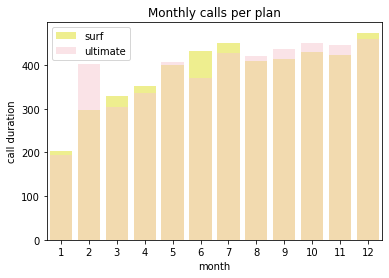

In [52]:
ax = plt.subplots()

ax= sns.barplot(
    x=call_month_by_plan.loc[0:11,'month'],
    y=call_month_by_plan.loc[0:11, 'duration'],
    color='yellow',
    alpha=0.5,
    label='surf'
)

ax= sns.barplot(
    x=call_month_by_plan.loc[12:23,'month'],
    y=call_month_by_plan.loc[12:23, 'duration'],
    color ='pink',
    alpha = 0.5,
    label='ultimate'
)

ax.set_ylabel('call duration')
ax.set_title('Monthly calls per plan')
ax.legend()

plt.show()


    


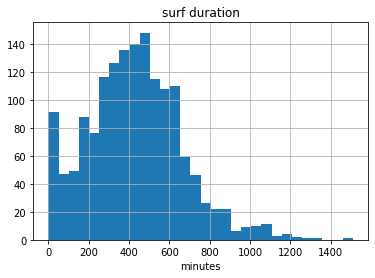

In [53]:
surf_minutes =df[df['plan']=='surf']

surf_minutes.hist('duration', bins=30,)
plt.xlabel('minutes')
plt.title('surf duration')
plt.show()


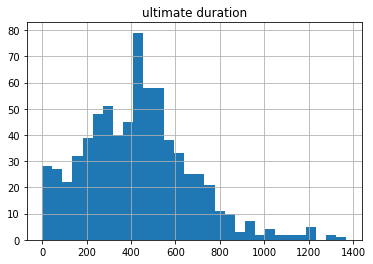

In [54]:
ultimate_minutes =df[df['plan']=='ultimate']

ultimate_minutes.hist('duration', bins=30,)
plt.title('ultimate duration')
plt.show()

In [55]:
# Calculate the mean and the variance of the monthly call duration
surf_minutes.groupby('month')['duration'].mean()

month
1     203.000000
2     297.000000
3     330.000000
4     351.540000
5     399.584416
6     431.298969
7     449.983471
8     410.111111
9     414.226804
10    429.729958
11    423.325088
12    473.836478
Name: duration, dtype: float64

In [56]:
surf_minutes.groupby('month')['duration'].var()

month
1     15842.000000
2     52226.500000
3     35809.363636
4     50866.743265
5     59754.219754
6     45592.628436
7     61005.099725
8     54344.645963
9     46595.958656
10    52278.664056
11    51607.021602
12    63629.518918
Name: duration, dtype: float64

In [57]:
ultimate_minutes.groupby('month')['duration'].mean()

month
1     193.500000
2     403.142857
3     304.250000
4     336.857143
5     406.241379
6     370.957447
7     427.067797
8     421.436620
9     437.511628
10    450.735849
11    445.196850
12    459.099338
Name: duration, dtype: float64

In [58]:
ultimate_minutes.groupby('month')['duration'].var()

month
1     16572.333333
2     76889.476190
3     61984.931818
4     34888.928571
5     43841.046798
6     42503.563367
7     72563.374635
8     53645.506640
9     57070.464569
10    54261.910512
11    60593.222847
12    62503.783400
Name: duration, dtype: float64

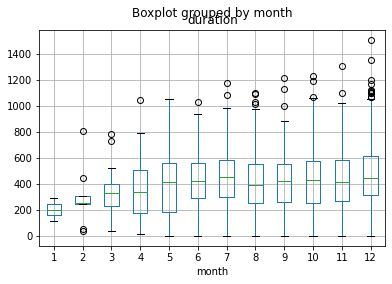

In [59]:
# Plot a boxplot to visualize the distribution of the monthly call duration

df.query('plan == "surf"').boxplot(by='month', column='duration');

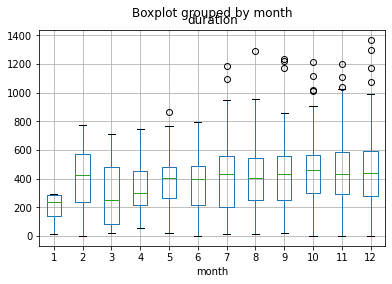

In [60]:
df.query('plan == "ultimate"').boxplot(by='month', column='duration');

The barplot shows that duration of the calls were similar between both plans. For the month of February there was a significant difference, Ultimate plan averaged around 400 minutes while surf call durations were around 300. In june, surf averaged around 430 minutes while ultimate had 370.But as stated previously the had similar averages for all other months.
Both histograms are skewed-right.For both plans calls lasted within 200-600 minutes. As for the surf & ultimate barplot it shows that the duration were within range. Calls lasted 200 minutes and less than 600 minutes. Of course, there are outliers in the calls with users going above 1000 minutes but nothing to worry about herefor ultimate users as they are part of their plans. Surf users who went above might want to switch over to ultimate.

### Messages

In [61]:
# Compare the number of messages users of each plan tend to send each month

msgs_per_month = df.pivot_table(index=['plan', 'month'], values='msgs_sent', aggfunc='mean').reset_index()
print(msgs_per_month)

        plan  month  msgs_sent
0       surf      1  10.500000
1       surf      2  12.000000
2       surf      3  15.260870
3       surf      4  17.400000
4       surf      5  24.012987
5       surf      6  25.298969
6       surf      7  27.033058
7       surf      8  28.777778
8       surf      9  30.762887
9       surf     10  33.839662
10      surf     11  32.385159
11      surf     12  38.600629
12  ultimate      1  15.500000
13  ultimate      2  21.571429
14  ultimate      3  20.250000
15  ultimate      4  22.047619
16  ultimate      5  32.103448
17  ultimate      6  29.340426
18  ultimate      7  32.830508
19  ultimate      8  38.478873
20  ultimate      9  37.895349
21  ultimate     10  39.443396
22  ultimate     11  38.606299
23  ultimate     12  45.006623


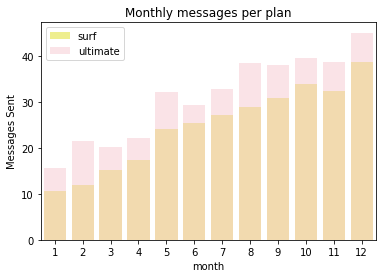

In [62]:
ax = plt.subplots()

ax= sns.barplot(
    x=msgs_per_month.loc[0:11,'month'],
    y=msgs_per_month.loc[0:11, 'msgs_sent'],
    color='yellow',
    alpha=0.5,
    label='surf'
)

ax= sns.barplot(
    x=msgs_per_month.loc[12:23,'month'],
    y=msgs_per_month.loc[12:23, 'msgs_sent'],
    color ='pink',
    alpha = 0.5,
    label='ultimate'
)

ax.set_ylabel('Messages Sent')
ax.set_title('Monthly messages per plan')
ax.legend()

plt.show()

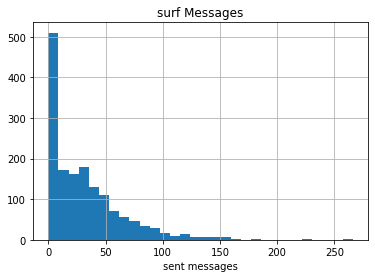

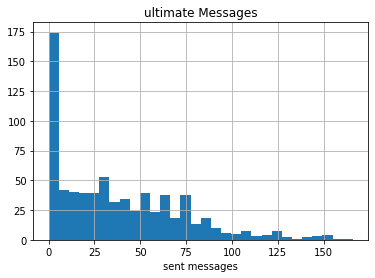

In [63]:
surf_msgs =df[df['plan']=='surf']

surf_msgs.hist('msgs_sent', bins=30,)
plt.xlabel('sent messages')
plt.title('surf Messages')
plt.show()

ultimate_msgs =df[df['plan']=='ultimate']

ultimate_msgs.hist('msgs_sent', bins=30,)
plt.xlabel('sent messages')
plt.title('ultimate Messages')
plt.show()

In [64]:
surf_msgs.groupby('month')['msgs_sent'].mean()

month
1     10.500000
2     12.000000
3     15.260870
4     17.400000
5     24.012987
6     25.298969
7     27.033058
8     28.777778
9     30.762887
10    33.839662
11    32.385159
12    38.600629
Name: msgs_sent, dtype: float64

In [65]:
surf_msgs.groupby('month')['msgs_sent'].var()

month
1      220.500000
2      386.000000
3      346.565217
4      501.591837
5      847.197198
6      914.920103
7      923.915565
8     1029.515528
9     1003.829496
10    1275.465708
11    1065.344034
12    1458.158612
Name: msgs_sent, dtype: float64

In [66]:
ultimate_msgs.groupby('month')['msgs_sent'].mean()

month
1     15.500000
2     21.571429
3     20.250000
4     22.047619
5     32.103448
6     29.340426
7     32.830508
8     38.478873
9     37.895349
10    39.443396
11    38.606299
12    45.006623
Name: msgs_sent, dtype: float64

In [67]:
ultimate_msgs.groupby('month')['msgs_sent'].var()

month
1      313.666667
2      478.285714
3      654.386364
4      544.147619
5     1297.310345
6      857.620722
7      960.488019
8     1196.367404
9     1050.918331
10    1221.106289
11    1232.669166
12    1549.419956
Name: msgs_sent, dtype: float64

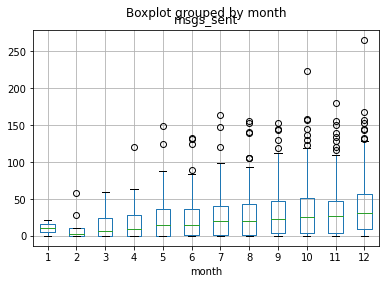

In [68]:
df.query('plan == "surf"').boxplot(by='month', column='msgs_sent');

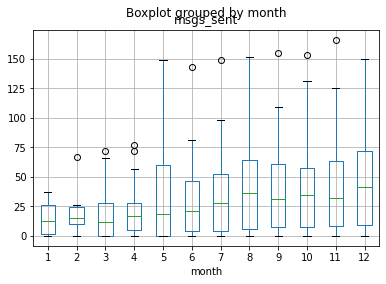

In [69]:
df.query('plan == "ultimate"').boxplot(by='month', column='msgs_sent');

The barplot above shows that ultimate texted more than surf users for each month. Both histograms are skewed-right. Histograms shows that there was above 500 surf users who did not send any messages. Surf plans allows them 50 messages per month, very few went above that. Ultimate had 175 users who did not send any messages and very few who went past 150 messages. Surprising as they have 1000 limit per month. Is that too much? Just as calls, they averaged very similar and can't say they have different behaviors.

### Internet

In [70]:
# Compare the amount of internet traffic consumed by users per plan

traffic_by_plan = df.pivot_table(index=['plan', 'month'], values='gb_used', aggfunc='mean').reset_index()
print(traffic_by_plan)

        plan  month    gb_used
0       surf      1   5.000000
1       surf      2  12.222222
2       surf      3  13.565217
3       surf      4  12.220000
4       surf      5  14.116883
5       surf      6  15.484536
6       surf      7  16.876033
7       surf      8  16.882716
8       surf      9  16.690722
9       surf     10  17.409283
10      surf     11  16.431095
11      surf     12  18.238994
12  ultimate      1   7.250000
13  ultimate      2  17.285714
14  ultimate      3  18.416667
15  ultimate      4  16.333333
16  ultimate      5  16.862069
17  ultimate      6  15.425532
18  ultimate      7  16.491525
19  ultimate      8  17.845070
20  ultimate      9  17.011628
21  ultimate     10  17.716981
22  ultimate     11  17.118110
23  ultimate     12  18.397351


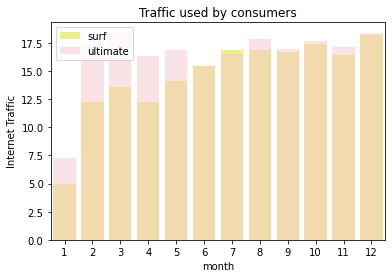

In [71]:
ax = plt.subplots()

ax= sns.barplot(
    x=traffic_by_plan.loc[0:11,'month'],
    y=traffic_by_plan.loc[0:11, 'gb_used'],
    color='yellow',
    alpha=0.5,
    label='surf'
)

ax= sns.barplot(
    x=traffic_by_plan.loc[12:23,'month'],
    y=traffic_by_plan.loc[12:23, 'gb_used'],
    color ='pink',
    alpha = 0.5,
    label='ultimate'
)

ax.set_ylabel('Internet Traffic')
ax.set_title('Traffic used by consumers')
ax.legend()

plt.show()

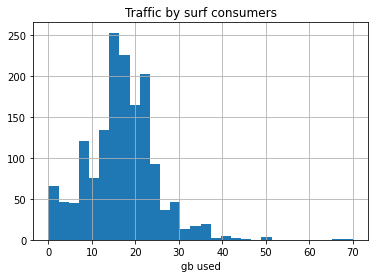

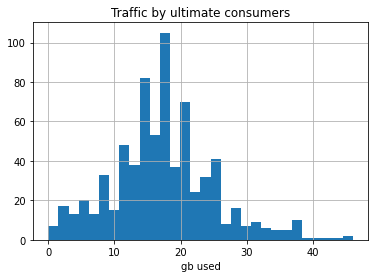

In [72]:
surf_internet =df[df['plan']=='surf']

surf_internet.hist('gb_used', bins=30,)
plt.xlabel('gb used')
plt.title('Traffic by surf consumers')
plt.show()

ultimate_internet =df[df['plan']=='ultimate']

ultimate_internet.hist('gb_used', bins=30,)
plt.xlabel('gb used')
plt.title('Traffic by ultimate consumers')
plt.show()

In [73]:
surf_internet.groupby('month')['gb_used'].mean()

month
1      5.000000
2     12.222222
3     13.565217
4     12.220000
5     14.116883
6     15.484536
7     16.876033
8     16.882716
9     16.690722
10    17.409283
11    16.431095
12    18.238994
Name: gb_used, dtype: float64

In [74]:
surf_internet.groupby('month')['gb_used'].var()

month
1     18.000000
2     41.444444
3     63.984190
4     56.215918
5     58.183527
6     47.752363
7     61.476171
8     71.420942
9     49.240639
10    60.725846
11    54.607824
12    69.210841
Name: gb_used, dtype: float64

In [75]:
ultimate_internet.groupby('month')['gb_used'].mean()

month
1      7.250000
2     17.285714
3     18.416667
4     16.333333
5     16.862069
6     15.425532
7     16.491525
8     17.845070
9     17.011628
10    17.716981
11    17.118110
12    18.397351
Name: gb_used, dtype: float64

In [76]:
ultimate_internet.groupby('month')['gb_used'].var()

month
1      14.916667
2      37.904762
3     138.628788
4      85.833333
5      54.194581
6      68.858464
7      64.254237
8      58.047082
9      47.258687
10     54.604852
11     54.390701
12     58.841060
Name: gb_used, dtype: float64

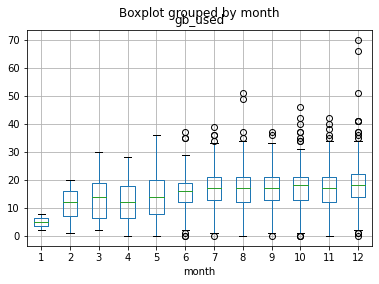

In [77]:
df.query('plan == "surf"').boxplot(by='month', column='gb_used');

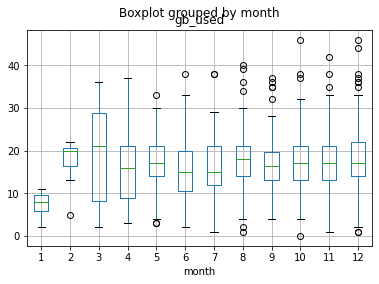

In [78]:
df.query('plan == "ultimate"').boxplot(by='month', column='gb_used');

As the barplot, histograms and boxplot above shows, ultimate had a higher use of data for the first 5 months of the year and had similar numbers for the rest of the year with surf users.Again surf users may want to switch over!!The only difference in behavior between the users of both plans is that surf users use up more of their data but that is because the plan only allows 15gb per month.

## Revenue

In [79]:
rev_per_plan = df.pivot_table(index=['plan', 'month'], values = 'revenue', aggfunc='mean').reset_index()
print(rev_per_plan)

        plan  month    revenue
0       surf      1  20.000000
1       surf      2  34.396667
2       surf      3  45.941304
3       surf      4  40.710600
4       surf      5  47.628182
5       surf      6  49.276289
6       surf      7  62.674050
7       surf      8  63.931173
8       surf      9  58.271495
9       surf     10  65.421224
10      surf     11  58.004276
11      surf     12  70.557044
12  ultimate      1  70.000000
13  ultimate      2  70.000000
14  ultimate      3  74.666667
15  ultimate      4  73.000000
16  ultimate      5  70.724138
17  ultimate      6  71.638298
18  ultimate      7  71.898305
19  ultimate      8  72.859155
20  ultimate      9  72.034884
21  ultimate     10  72.311321
22  ultimate     11  71.708661
23  ultimate     12  73.291391


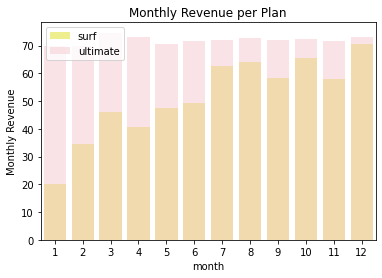

In [80]:
ax = plt.subplots()

ax= sns.barplot(
    x=rev_per_plan.loc[0:11,'month'],
    y=rev_per_plan.loc[0:11, 'revenue'],
    color='yellow',
    alpha=0.5,
    label='surf'
)

ax= sns.barplot(
    x=rev_per_plan.loc[12:23,'month'],
    y=rev_per_plan.loc[12:23, 'revenue'],
    color ='pink',
    alpha = 0.5,
    label='ultimate'
)

ax.set_ylabel('Monthly Revenue')
ax.set_title('Monthly Revenue per Plan')
ax.legend()

plt.show()

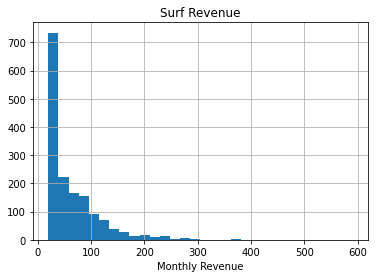

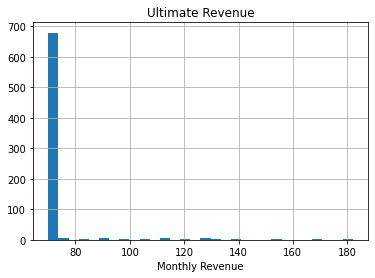

In [81]:
surf_rev =df[df['plan']=='surf']

surf_rev.hist('revenue', bins=30,)
plt.xlabel('Monthly Revenue')
plt.title('Surf Revenue')
plt.show()

ultimate_rev =df[df['plan']=='ultimate']

ultimate_rev.hist('revenue', bins=30,)
plt.xlabel('Monthly Revenue')
plt.title('Ultimate Revenue')
plt.show()

In [82]:
ultimate_rev.groupby('month')['revenue'].mean()

month
1     70.000000
2     70.000000
3     74.666667
4     73.000000
5     70.724138
6     71.638298
7     71.898305
8     72.859155
9     72.034884
10    72.311321
11    71.708661
12    73.291391
Name: revenue, dtype: float64

In [83]:
surf_rev.groupby('month')['revenue'].mean()

month
1     20.000000
2     34.396667
3     45.941304
4     40.710600
5     47.628182
6     49.276289
7     62.674050
8     63.931173
9     58.271495
10    65.421224
11    58.004276
12    70.557044
Name: revenue, dtype: float64

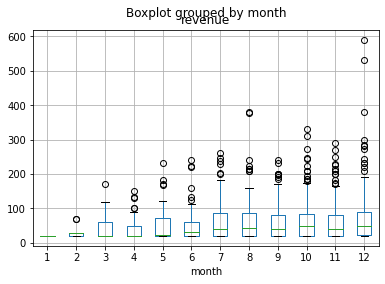

In [84]:
df.query('plan == "surf"').boxplot(by='month', column='revenue');

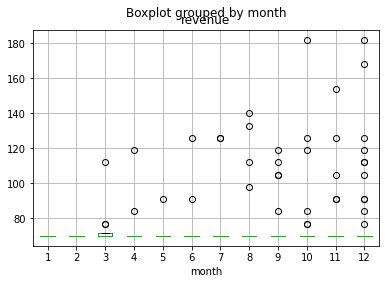

In [85]:
df.query('plan == "ultimate"').boxplot(by='month', column='revenue');

As far as revenue goes, ultimate plans sits at a stable 70 per month. Users of the surf plan are paying 20 a month but it since they up going above the plan limits they end up paying more each month.

## Test statistical hypotheses

In [86]:
# Test the hypotheses
alpha = 0.05

results = st.ttest_ind(surf_rev['revenue'], ultimate_rev['revenue'])

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  2.862674510698644e-08
We reject the null hypothesis


[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

In [87]:
df['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

In [88]:
# Test the hypotheses
ny_nj =df.query('city =="New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue']
other_cities = df.query('city !="New York-Newark-Jersey City, NY-NJ-PA MSA"')['revenue']

alpha= 0.05

results = st.ttest_ind(ny_nj, other_cities)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  0.0435574316213424
We reject the null hypothesis


## General conclusion

We merged and study the behavior of users of both plans based on calls, messages and internet. As stated previously, there were no major differences in their behavior other than the revenue the plans brought in. While there were more users on the surf plan, they did not bring in as much revenue as the ultimate plan even while execeding their plans data. It makes more sense for Megaline to continue advertising their ultimate plan. It would also benefit some surf users to switch over to the ultimate as some are paying well above the plans fee.